In [832]:
import numpy as np
import yfinance as yf

In [833]:
sp500 = yf.Ticker("^GSPC").history(period="10y")['Close']
sp500.index = sp500.index.date # keep only date info in index

In [834]:
jpy = yf.Ticker("JPY=X").history(period="10y")['Close']
jpy.index = jpy.index.date

### Task 1 - What is the sharpe ratio of buying and holding the SP500 for the last 10 years?

Buying and holding the S&P for the last 10 years would have given you an annualised sharpe of: 0.7138849333943242


<Axes: >

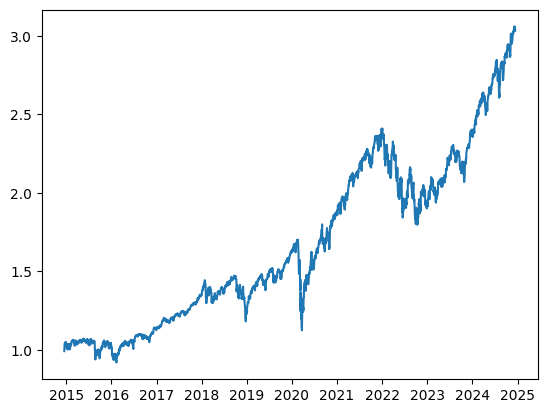

In [835]:
sp500_rets = sp500.pct_change().dropna() # sonverting daily prices to daily returns
sp500_performance = (1 + sp500_rets).cumprod()
sp500_sharpe = (sp500_rets.mean() * 252) / (sp500_rets.std() * (252)**0.5) # we have to annualise from daily returns

print("Buying and holding the S&P for the last 10 years would have given you an annualised sharpe of: " + str(sp500_sharpe))
sp500_performance.plot()

### Task 2 - Build a strategy to trade a momentum signal for USDJPY.

<Axes: >

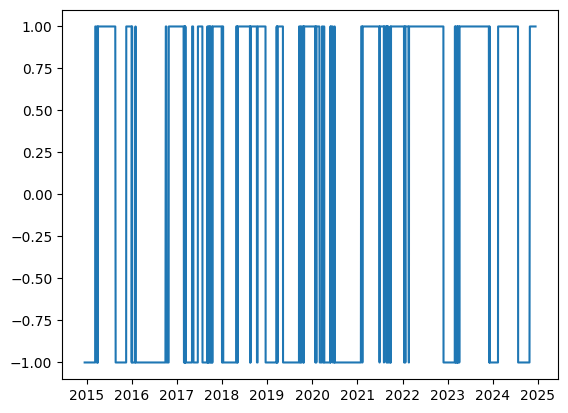

In [836]:
# Discrete Hardcoded Indicator & Strat: if the sum of last 63 daily returns > 0  buy, < 0 sell

window = 63
jpy_rets = jpy.pct_change().dropna()
jpy_signal = jpy_rets.rolling(window).sum().apply(lambda x : 1 if x > 0 else -1)
jpy_signal.plot()

The JPY momentum strategy would have given you an annualised sharpe of: 0.3727845355733991 over the last 10 years.


<Axes: >

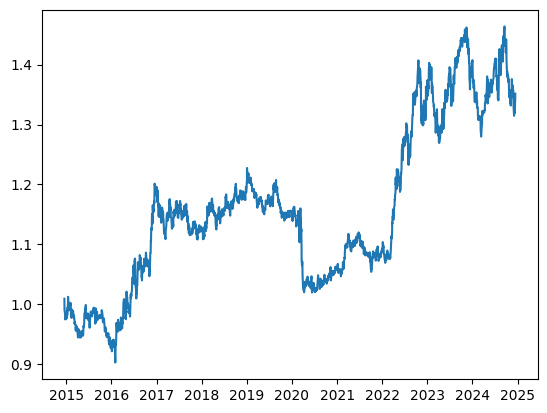

In [837]:
jpy_signal_rets = (jpy_rets * jpy_signal.shift(1)).dropna()
jpy_signal_performance = (1 + jpy_signal_rets).cumprod()
jpy_signal_sharpe = (jpy_signal_rets.mean() * 252) / (jpy_signal_rets.std() * (252)**0.5) # we have to annualise from daily returns

print("The JPY momentum strategy would have given you an annualised sharpe of: " + str(jpy_signal_sharpe) + " over the last 10 years.")
jpy_signal_performance.plot()

### Task 3 - Turn it into a mean-reversion strategy

The JPY mean reversion strategy would have given you an annualised sharpe of: -0.3727845355733991 over the last 10 years.


<Axes: >

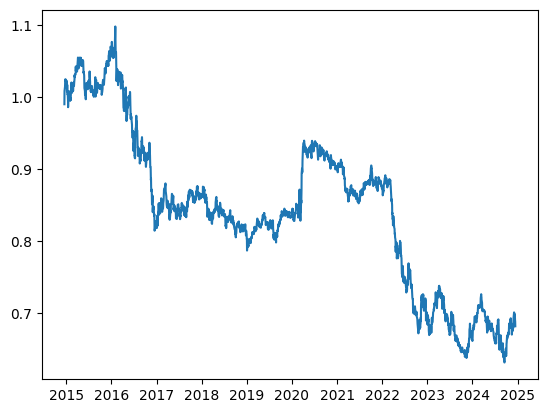

In [838]:
reverse_jpy_signal = jpy_signal.apply(lambda x: -1 if x > 0 else 1) # just switch longs and shorts (MR is like shorting the momentum strat and vice-versa)
reverse_jpy_signal_rets = (jpy_rets * reverse_jpy_signal.shift(1)).dropna()
reverse_jpy_signal_performance = (1 + reverse_jpy_signal_rets).cumprod()
reverse_jpy_signal_sharpe = (reverse_jpy_signal_rets.mean() * 252) / (reverse_jpy_signal_rets.std() * (252)**0.5) # we have to annualise from daily returns

print("The JPY mean reversion strategy would have given you an annualised sharpe of: " + str(reverse_jpy_signal_sharpe) + " over the last 10 years.")
reverse_jpy_signal_performance.plot()

### Task 4 - Combine JPY momentum and SP500 buy and hold into one portfolio, with equal risk contribution

<Axes: >

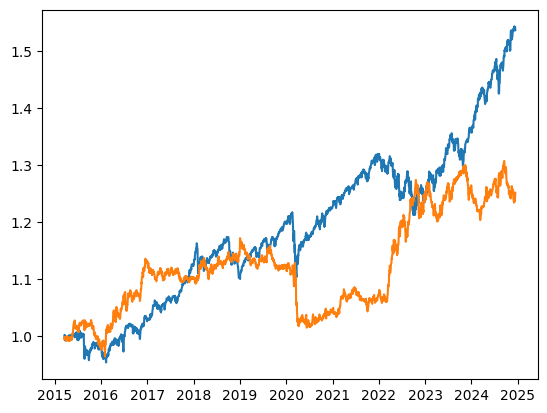

In [839]:
sp500_vol = sp500_rets.rolling(window).std()
jpy_vol = jpy_signal_rets.rolling(window).std()
rolling_total_vol = sp500_vol + jpy_vol

sp500_weights_raw = (0.5 * rolling_total_vol) / sp500_vol
jpy_signal_weights_raw = (0.5 * rolling_total_vol) / jpy_vol
weight_sum = sp500_weights_raw + jpy_signal_weights_raw

# Normalize weights to ensure they sum to 1
sp500_weights = sp500_weights_raw / weight_sum
jpy_signal_weights = jpy_signal_weights_raw / weight_sum

sp500_weighted_rets = (sp500_rets * sp500_weights.shift(1)).dropna()
jpy_signal_weighted_rets = (jpy_signal_rets * jpy_signal_weights.shift(1)).dropna()

# sp500_weighted_rets.plot()
# jpy_signal_weighted_rets.plot()

# sp500_weights.plot()
# jpy_signal_weights.plot()

sp500_weighted_performance = (1 + sp500_weighted_rets).cumprod()
jpy_signal_weighted_performance = (1 + jpy_signal_weighted_rets ).cumprod()

sp500_weighted_performance.plot()
jpy_signal_weighted_performance.plot()

# correlation = sp500_rets.corr(jpy_signal_rets)